# Solving Boundary Value Problems using Shooting Method

In [128]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [129]:
def f1(x, p ,q):
    return q

In [149]:
def f2(x, p, q):
    # return 6*p*p   # This is for an example problem
    # return p       # This is for problem 2  
    
    # The following is for problem 1
    
    if x == 0:
        return 0
    else:
        return (1 + q**2)/(1.0 * p)

In [152]:
def runge_kutta_4(x, p, q, h):
    u = np.vstack((p,q))
    
    for i in range(len(p)-1):
        k1 = np.array((f1(x[i], p[i], q[i]), f2(x[i], p[i], q[i])))
        #print 'k1 is %s' %(k1)
        k2 = np.array((f1(x[i] + 0.5*h, p[i] + k1[0]*h*0.5, q[i] + k1[1]*h*0.5 ), f2(x[i] + 0.5*h, p[i] + k1[0]*h*0.5, q[i] + k1[1]*h*0.5 )))
        #print 'k2 is %s' %(k2)
        k3 = np.array((f1(x[i] + 0.5*h, p[i] + k2[0]*h*0.5, q[i] + k2[1]*h*0.5 ), f2(x[i] + 0.5*h, p[i] + k2[0]*h*0.5, q[i] + k2[1]*h*0.5 )))
        #print 'k3 is %s' %(k3)
        k4 = np.array((f1(x[i] + h, p[i] + k3[0]*h, q[i] + k3[1]*h ), f2(x[i] + h, p[i] + k3[0]*h, q[i] + k3[1]*h )))
        #print 'k4 is %s' %(k4)
        u[:,i+1] = u[:,i] + (h/6.0) * (k1 + 2*k2 + 2*k3 + k4)
        p = u[0]
        q = u[1]
        
    #print 'Final u is : - %s' % (u)    
    return p,q

In [155]:
def bvp(ya, yb, a0, a1, start, end, h, conv_threshold):
    x = np.linspace(start, end, int((end - start)/(1.0 * h) +1) )
    p = x.copy()
    q = x.copy()
    p[0] = ya   
    
    while abs(a0 - a1) > conv_threshold:
        q[0] = a0
        p, q = runge_kutta_4(x, p, q, h)
        y0 = p[-1]
        q[0] = a1
        p, q = runge_kutta_4(x, p , q, h)
        y1 = p[-1]
        
        a2 = a0 - (a1 - a0)*(y0 - yb)/(1.0*(y1 - y0))
        #print '\nAlpha0 = %s, Error0 = %s' % (a0, y0 - yb)
        #print 'Alpha1 = %s, Error1 = %s' % (a1, y1 - yb)
        #print 'New alpha is %s\n' % a2
        a0 = a1
        a1 = a2
    print "Alpha has converged to %s" % (a0)
    print '\nx is \t %s' % x
    print 'y is \t %s' % p
    print 'dy/dt is %s' % q
    plt.plot(x, p)
    

Alpha has converged to 0.366032981181

x is 	 [ 0.   0.2  0.4  0.6  0.8  1. ]
y is 	 [ 1.          1.08838444  1.22529245  1.41671897  1.67118109  2.00000072]
dy/dt is [ 0.36603298  0.55930299  0.81477713  1.10650774  1.44747393  1.8528456 ]


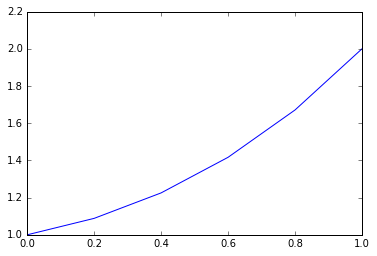

In [156]:
def main():
    bvp(1, 2, 0.5, 1.0, 0, 1, 0.2, 0.000001)               # For problem 1    
    #bvp(0, -1, 0.3, 0.4, 0, 1, 0.1, 0.0001)              # For problem 2
    #bvp(1, 4/9.0, -1.8, -1.9, 0, 0.5, 0.1, 0.00001)     # For example Problem

main()    